<a href="https://colab.research.google.com/github/WoogiWooks/DLCV_New/blob/main/10_Ultralytics_YOLO_v5_%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ultralytics YOLO ""*v5*"" 써보기**
## +COCO형태를 Ultralytics YOLO 포맷으로 바꾸기

* 앞선 예시들은 VOC 형태를 U.Y 포맷으로 바꿈
* voc2coco 와 같은 유틸리티 활용 (ex. JSON2YOLO)

## **v5 다운로드**

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5;pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10987, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10987 (delta 3), reused 2 (delta 1), pack-reused 10980
Receiving objects: 100% (10987/10987), 11.08 MiB | 31.51 MiB/s, done.
Resolving deltas: 100% (7590/7590), done.


## **XML 형태의 BCCD 데이터셋을 "voc2coco" 를 통해 COCO 포맷으로 바꾸기**

In [ ]:
import os

!git clone https://github.com/Shenggan/BCCD_Dataset.git
!git clone https://github.com/yukkyo/voc2coco.git

# voc2coco 에서 사용할 labels.txt 생성
# colab 버전은 아래 명령어로 BCCD의 labels.txt를 생성합니다.  
with open('/content/BCCD_Dataset/BCCD/labels.txt', "w") as f:
    f.write("WBC\n")
    f.write("RBC\n")
    f.write("Platelets\n")

!cat /content/BCCD_Dataset/BCCD/labels.txt

fatal: destination path 'BCCD_Dataset' already exists and is not an empty directory.
fatal: destination path 'voc2coco' already exists and is not an empty directory.
WBC
RBC
Platelets


In [ ]:
# VOC를 COCO로 변환 수행
# 학습/검증/테스트 용 json annotation을 각각 생성
# --ann dir : xml annotation 파일 경로
# --ann_ids : 학습/검증/테스트용 메타파일 경로
# --labels : 위에서 만든 데이터 내 label 정리한 파일 경로
# --output : 결과 저장 경로

%cd voc2coco
!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/train.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/val.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/val.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/test.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/test.json \
--ext xml

# annotation json 파일을 잘 볼수 있는 jq 유틸리티 셋업. 
!sudo apt-get install jq
!jq . /content/BCCD_Dataset/BCCD/train.json > output.json
!tail -100 output.json

/content/voc2coco
Start converting !
100% 205/205 [00:00<00:00, 4890.55it/s]
Start converting !
100% 87/87 [00:00<00:00, 4792.42it/s]
Start converting !
100% 72/72 [00:00<00:00, 5039.30it/s]
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libjq1 libonig4
The following NEW packages will be installed:
  jq libjq1 libonig4
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 276 kB of archives.
After this operation, 930 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libonig4 amd64 6.7.0-1 [119 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libjq1 amd64 1.5+dfsg-2 [111 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 jq amd64 1.5+dfsg-2 [45

## **COCO 포맷을 "COCO2YOLO" 를 통해 Ultralytics YOLO 포맷으로 바꾸기**
* https://github.com/alexmihalyk23/COCO2YOLO.git 를 약간 수정하여 변환로직 생성
* 한개의 json annotation 파일이 여러개의 yolo 포맷 annotation 파일로 변환됨
* 경로 인자 설정 후 coco2yolo 를 통해 yolo 포맷으로 변환

In [ ]:
# 입력인자 확인용
# src_img_dir = 이미지가 있는 경로
# json_file = json annotation 파일이 있는 경로
# tgt_img_dir = 이미지들이 복사되어 들어갈 경로
# tgt_anno_dir = U.Y 포맷 annotation 파일이 들어갈 경로


# train_yolo_converter = COCO2YOLO(src_img_dir='/content/BCCD_Dataset/BCCD/JPEGImages', json_file='/content/BCCD_Dataset/BCCD/train.json', tgt_img_dir='/content/bccd/images/train', tgt_anno_dir='/content/bccd/labels/train')
# train_yolo_converter.coco2yolo()

In [ ]:
# 학습/검증/테스트용 images, labels 디렉토리 생성. 
!mkdir /content/bccd;
!cd /content/bccd; mkdir images; mkdir labels;
!cd /content/bccd/images; mkdir train; mkdir val; mkdir test
!cd /content/bccd/labels; mkdir train; mkdir val; mkdir test

In [ ]:
# https://github.com/alexmihalyk23/COCO2YOLO.git 코드 내용
# 약간의 수정을 통해 변환로직 생성
# 어떤 원리로 돌아가는건지 이해가 필요하므로 복습하자!!

import json
import os
import shutil

class COCO2YOLO:
  # 소스 이미지 디렉토리와 Json annotation 파일, 타겟 이미지 디렉토리, 타겟 annotation 디렉토리를 생성자로 입력 받음. 
  def __init__(self, src_img_dir, json_file, tgt_img_dir, tgt_anno_dir):
    self.json_file = json_file
    self.src_img_dir = src_img_dir
    self.tgt_img_dir = tgt_img_dir
    self.tgt_anno_dir = tgt_anno_dir
    # json 파일과 타겟 디렉토리가 존재하는지 확인하고, 디렉토리의 경우는 없으면 생성. 
    self._check_file_and_dir(json_file, tgt_img_dir, tgt_anno_dir)
    # json 파일을 메모리로 로딩. 
    self.labels = json.load(open(json_file, 'r', encoding='utf-8'))
    # category id와 이름을 매핑하지만, 실제 class id는 이를 적용하지 않고 별도 적용. 
    self.coco_id_name_map = self._categories()
    self.coco_name_list = list(self.coco_id_name_map.values())
    print("total images", len(self.labels['images']))
    print("total categories", len(self.labels['categories']))
    print("total labels", len(self.labels['annotations']))
  
  # json 파일과 타겟 디렉토리가 존재하는지 확인하고, 디렉토리의 경우는 없으면 생성. 
  def _check_file_and_dir(self, file_path, tgt_img_dir, tgt_anno_dir):
    if not os.path.exists(file_path):
        raise ValueError("file not found")
    if not os.path.exists(tgt_img_dir):
        os.makedirs(tgt_img_dir)
    if not os.path.exists(tgt_anno_dir):
        os.makedirs(tgt_anno_dir)

  # category id와 이름을 매핑하지만, 추후에 class 명만 활용. 
  def _categories(self):
    categories = {}
    for cls in self.labels['categories']:
        categories[cls['id']] = cls['name']
    return categories
  
  # annotation에서 모든 image의 파일명(절대 경로 아님)과 width, height 정보 저장. 
  def _load_images_info(self):
    images_info = {}
    for image in self.labels['images']:
        id = image['id']
        file_name = image['file_name']
        if file_name.find('\\') > -1:
            file_name = file_name[file_name.index('\\')+1:]
        w = image['width']
        h = image['height']
  
        images_info[id] = (file_name, w, h)

    return images_info

  # ms-coco의 bbox annotation은 yolo format으로 변환. 좌상단 x, y좌표, width, height 기반을 정규화된 center x,y 와 width, height로 변환. 
  def _bbox_2_yolo(self, bbox, img_w, img_h):
    # ms-coco는 좌상단 x, y좌표, width, height
    x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
    # center x좌표는 좌상단 x좌표에서 width의 절반을 더함. center y좌표는 좌상단 y좌표에서 height의 절반을 더함.  
    centerx = bbox[0] + w / 2
    centery = bbox[1] + h / 2
    # centerx, centery, width, height를 이미지의 width/height로 정규화. 
    dw = 1 / img_w
    dh = 1 / img_h
    centerx *= dw
    w *= dw
    centery *= dh
    h *= dh
    return centerx, centery, w, h
  
  # image와 annotation 정보를 기반으로 image명과 yolo annotation 정보 가공. 
  # 개별 image당 하나의 annotation 정보를 가지도록 변환. 
  def _convert_anno(self, images_info):
    anno_dict = dict()
    for anno in self.labels['annotations']:
      bbox = anno['bbox']
      image_id = anno['image_id']
      category_id = anno['category_id']

      image_info = images_info.get(image_id)
      image_name = image_info[0]
      img_w = image_info[1]
      img_h = image_info[2]
      yolo_box = self._bbox_2_yolo(bbox, img_w, img_h)

      anno_info = (image_name, category_id, yolo_box)
      anno_infos = anno_dict.get(image_id)
      if not anno_infos:
        anno_dict[image_id] = [anno_info]
      else:
        anno_infos.append(anno_info)
        anno_dict[image_id] = anno_infos
    return anno_dict

  # class 명을 파일로 저장하는 로직. 사용하지 않음. 
  def save_classes(self):
    sorted_classes = list(map(lambda x: x['name'], sorted(self.labels['categories'], key=lambda x: x['id'])))
    print('coco names', sorted_classes)
    with open('coco.names', 'w', encoding='utf-8') as f:
      for cls in sorted_classes:
          f.write(cls + '\n')
    f.close()
  # _convert_anno(images_info)로 만들어진 anno 정보를 개별 yolo anno txt 파일로 생성하는 로직. 
  # coco2yolo()에서 anno_dict = self._convert_anno(images_info)로 만들어진 anno_dict를 _save_txt()에 입력하여 파일 생성
  def _save_txt(self, anno_dict):
    # 개별 image별로 소스 image는 타겟이미지 디렉토리로 복사하고, 개별 annotation을 타겟 anno 디렉토리로 생성. 
    for k, v in anno_dict.items():
      # 소스와 타겟 파일의 절대 경로 생성. 
      src_img_filename = os.path.join(self.src_img_dir, v[0][0])
      tgt_anno_filename = os.path.join(self.tgt_anno_dir,v[0][0].split(".")[0] + ".txt")
      #print('source image filename:', src_img_filename, 'target anno filename:', tgt_anno_filename)
      # 이미지 파일의 경우 타겟 디렉토리로 단순 복사. 
      shutil.copy(src_img_filename, self.tgt_img_dir)
      # 타겟 annotation 출력 파일명으로 classid, bbox 좌표를 object 별로 생성. 
      with open(tgt_anno_filename, 'w', encoding='utf-8') as f:
        #print(k, v)
        # 여러개의 object 별로 classid와 bbox 좌표를 생성. 
        for obj in v:
          cat_name = self.coco_id_name_map.get(obj[1])
          # category_id는 class 명에 따라 0부터 순차적으로 부여. 
          category_id = self.coco_name_list.index(cat_name)
          #print('cat_name:', cat_name, 'category_id:', category_id)
          box = ['{:.6f}'.format(x) for x in obj[2]]
          box = ' '.join(box)
          line = str(category_id) + ' ' + box
          f.write(line + '\n')

  # ms-coco를 yolo format으로 변환
  # 위에서 생성한 함수와 init 인자 기반으로 변환 작동 
  def coco2yolo(self):
    print("loading image info...")
    images_info = self._load_images_info()
    print("loading done, total images", len(images_info))

    print("start converting...")
    anno_dict = self._convert_anno(images_info)
    print("converting done, total labels", len(anno_dict))

    print("saving txt file...")
    self._save_txt(anno_dict)
    print("saving done")

  

In [ ]:
# train 용 yolo 데이터 세트 생성. 
train_yolo_converter = COCO2YOLO(src_img_dir='/content/BCCD_Dataset/BCCD/JPEGImages', json_file='/content/BCCD_Dataset/BCCD/train.json',
                                 tgt_img_dir='/content/bccd/images/train', tgt_anno_dir='/content/bccd/labels/train')
train_yolo_converter.coco2yolo()

# val 용 yolo 데이터 세트 생성. 
val_yolo_converter = COCO2YOLO(src_img_dir='/content/BCCD_Dataset/BCCD/JPEGImages', json_file='/content/BCCD_Dataset/BCCD/val.json',
                                 tgt_img_dir='/content/bccd/images/val', tgt_anno_dir='/content/bccd/labels/val')
val_yolo_converter.coco2yolo()

# test 용 yolo 데이터 세트 생성. 
test_yolo_converter = COCO2YOLO(src_img_dir='/content/BCCD_Dataset/BCCD/JPEGImages', json_file='/content/BCCD_Dataset/BCCD/test.json',
                                 tgt_img_dir='/content/bccd/images/test', tgt_anno_dir='/content/bccd/labels/test')
test_yolo_converter.coco2yolo()

total images 205
total categories 3
total labels 2805
loading image info...
loading done, total images 205
start converting...
converting done, total labels 205
saving txt file...
saving done
total images 87
total categories 3
total labels 1138
loading image info...
loading done, total images 87
start converting...
converting done, total labels 87
saving txt file...
saving done
total images 72
total categories 3
total labels 945
loading image info...
loading done, total images 72
start converting...
converting done, total labels 72
saving txt file...
saving done


## **yaml 파일과 학습 수행**
* v5 버전은 모델의 네트워크 구조의 깊이 정도에 따라 yolov5s, yolov5m, yolov5l, yolov5x 로 나눠짐
* weight 인자값으로 이들 중 하나를 입력해주어야 함

In [ ]:
""" v5 의 특징 """
""" 모델이 yolov5s, yolov5m, yolov5l, yolov5x 로 나눠짐 """
""" weight 인자값으로 이들 중 하나를 입력해 줌 """

In [ ]:
# yaml 파일 다운로드해서 가져오기

!wget -O /content/bccd/bccd.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/bccd.yaml

--2022-02-25 12:32:27--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/bccd.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184 [text/plain]
Saving to: ‘/content/bccd/bccd.yaml’

/content/bccd/bccd. 100%[===================>]     184  --.-KB/s    in 0s      

2022-02-25 12:32:27 (10.6 MB/s) - ‘/content/bccd/bccd.yaml’ saved [184/184]



In [ ]:
###  10번 미만 epoch는 좋은 성능이 안나오므로 최소 30번 이상 epoch 적용
### 시간 관계상 epoch 수 줄여서 진행

### large 모델 적용 시 batch size가 8보다 클 경우 colab에서 memory 부족 발생
### 큰 모델일수록 학습할 weight 수가 커지므로

### 혈소판(Platelets) 의 경우 상대적으로 mAP:0.5~0.95 Detection 성능이 좋지 못함
### 백혈구 만큼 학습데이터가 적은것도 이유지만, Object 사이즈가 상대적으로 작음.

!cd /content/yolov5; python train.py --img 640 --batch 8 --epochs 10 --data /content/bccd/bccd.yaml --weights yolov5l.pt \
                                     --project=/content/drive/MyDrive/Colab\ Notebooks/DLCV/8.\ weight\ 저장 --name bccd --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov5l.pt, cfg=, data=/content/bccd/bccd.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/Colab Notebooks/DLCV/8. weight 저장, name=bccd, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-8-g0f81991 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01,

In [ ]:
# Counter 모듈 통한 Class별 갯수 확인하기 in Trainset

from collections import Counter

anno_list = train_yolo_converter.labels['annotations']
category_list = [x['category_id'] for x in anno_list]

Counter(category_list)

Counter({1: 214, 2: 2382, 3: 209})

## **Train 이후 Inference 수행**

In [ ]:
!cd /content/yolov5;python detect.py --source /content/bccd/images/test/BloodImage_00011.jpg \
                            --weights /content/drive/MyDrive/Colab\ Notebooks/DLCV/8.\ weight\ 저장/bccd/weights/best.pt --conf 0.2 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/content/drive/MyDrive/Colab Notebooks/DLCV/8. weight 저장/bccd/weights/best.pt'], source=/content/bccd/images/test/BloodImage_00011.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-8-g0f81991 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 367 layers, 46119048 parameters, 0 gradients, 107.8 GFLOPs
image 1/1 /content/bccd/images/test/BloodImage_00011.jpg: 480x640 1 WBC, 38 RBCs, 1 Platelets, Done. (0.063s)
Speed: 0.8ms pre-process, 63.3ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


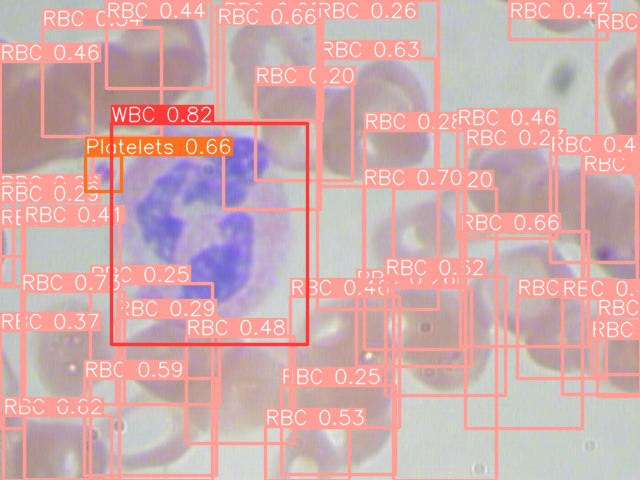

In [ ]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/BloodImage_00011.jpg', width=800)

## **Test 데이터셋을 통한 Evaluation**

In [ ]:
!cd /content/yolov5; python val.py --weights /content/drive/MyDrive/Colab\ Notebooks/DLCV/8.\ weight\ 저장/bccd/weights/best.pt  --data /content/bccd/bccd.yaml \
                           --project /content/data/output --name=test_result --exist-ok --img 640 --iou 0.65


val: data=/content/bccd/bccd.yaml, weights=['/content/drive/MyDrive/Colab Notebooks/DLCV/8. weight 저장/bccd/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/data/output, name=test_result, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-8-g0f81991 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 367 layers, 46119048 parameters, 0 gradients, 107.8 GFLOPs
val: Scanning '/content/bccd/labels/val.cache' images and labels... 87 found, 0 missing, 0 empty, 0 corrupt: 100% 87/87 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:06<00:00,  2.17s/it]
                 all         87       1138      0.771      0.771      0.816      0.477
                 WBC         87         87      0.844      0.989   